In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk
import re
import string
from nltk.corpus import stopwords
stop = stopwords.words("english")


from nltk.stem import WordNetLemmatizer




In [2]:

df = pd.read_csv("data/Clothing_Shoes_Jewelry_Reviews.csv")

In [3]:
if 'Unnamed: 0' in df.columns:
    del df['Unnamed: 0']
else:
    exit

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [4]:
review_data=df.drop(['helpful','reviewTime','reviewerName','unixReviewTime'],axis=1)
review_data=review_data[review_data['overall']<=3.0]
review_data_sample=review_data.head(20)
review_data_sample

,reviewerID,asin,reviewText,overall,summary
15,A26A4KKLAVTMCC,0000031887,My 3yr old loved this tutu skirt in pink! Was ...,3.0,Came apart in 2weeks!
17,A2XJ13PIXVJFJH,0000031887,Never GOT this item - but gave a 1 STAR becaus...,1.0,Never GOT IT....
26,A3RB1JA72Z0TUN,0123456479,I already own this particular Shining Image je...,3.0,Arrived with a defect
27,A1JC50F14SLAEV,0123456479,I wanted to have the title summarize my though...,3.0,Nice Size But Drawers Are A Concern
33,A28QH3KX709FFQ,1608299953,I bought this product a little over a year ago...,1.0,DO NOT BUY IF YOU EVER WANT TO RESELL IT.
70,A3VZ1PO40JCGFV,B00001WRHJ,Have they lost their minds??!! Over 100$ for a...,1.0,WHAT!?
73,A319M5UYKNLK8B,B00004SR8W,"I bought this, but it is too large for me. If ...",3.0,A bit too large for me
83,A2GLR9H28HPTW6,B00004SR8W,Once I found the special travel wallets for th...,3.0,"Great idea, but..."
84,A3SC04DC5TLYSP,B00004SR8Z,This pouch is lightweight and comfortable to w...,3.0,Would like it to be a bit longer
106,A1Z9NIQKY3VLVG,B00004SR9P,It's too short to be particularly useful. If i...,2.0,too short


In [248]:
s1=review_data['reviewText'][6249]

In [5]:
# new_text=re.sub("[^a-zA-Z]"," ", s1)
# new_text

# words = new_text.lower().split()

# sts = set(stopwords.words("english"))
# words = [w for w in words if not w in sts]


# words


# lemmatizer = WordNetLemmatizer()

# for w in words:
#     print(lemmatizer.lemmatize(w))
    
    
# print(lemmatizer.lemmatize(s1))

from nltk.sentiment.vader import SentimentIntensityAnalyzer

pos_score=[]
neu_score=[]
neg_score=[]

for i in review_data_sample['reviewText']:
    analyser2 = SentimentIntensityAnalyzer()
    s=analyser2.polarity_scores(i)
    print(s)
    pos_score.append(s['pos']*10)
    neu_score.append(s['neu']*10)
    neg_score.append(s['neg']*10)

new_rev_df=pd.DataFrame()
new_rev_df['Positive']=pos_score
new_rev_df['Neutral']=neu_score
new_rev_df['Negative']=neg_score

# x_rev = ['Positive','Neutral','Negative']
# y_rev = list(pos_score,neu_score,neg_score)

# # mask1=pos_score != 0.0
# # mask2=neu_score != 0.0
# # mask3=neg_score != 0.0
# # plt.bar(x_rev[mask1], y_rev[mask1], color = 'green')
# # plt.bar(x_rev[mask2], y_rev[mask2], color = 'purple')
# plt.bar(x_rev, y_rev, color = 'blue')
# # plt.show()

new_rev_df

{'neg': 0.079, 'neu': 0.744, 'pos': 0.177, 'compound': 0.7834}
{'neg': 0.067, 'neu': 0.841, 'pos': 0.091, 'compound': 0.3612}
{'neg': 0.041, 'neu': 0.84, 'pos': 0.119, 'compound': 0.6757}
{'neg': 0.057, 'neu': 0.866, 'pos': 0.077, 'compound': 0.3506}
{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'compound': -0.4389}
{'neg': 0.194, 'neu': 0.681, 'pos': 0.125, 'compound': -0.5466}
{'neg': 0.039, 'neu': 0.907, 'pos': 0.054, 'compound': 0.2582}
{'neg': 0.058, 'neu': 0.838, 'pos': 0.104, 'compound': 0.3612}
{'neg': 0.037, 'neu': 0.839, 'pos': 0.124, 'compound': 0.6908}
{'neg': 0.046, 'neu': 0.85, 'pos': 0.104, 'compound': 0.5256}
{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.7003}
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4662}
{'neg': 0.026, 'neu': 0.897, 'pos': 0.077, 'compound': 0.5187}
{'neg': 0.085, 'neu': 0.86, 'pos': 0.056, 'compound': -0.25}
{'neg': 0.099, 'neu': 0.83, 'pos': 0.071, 'compound': -0.6059}
{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'compound': 0.25}
{'ne

,Positive,Neutral,Negative
0,1.77,7.44,0.79
1,0.91,8.41,0.67
2,1.19,8.40,0.41
3,0.77,8.66,0.57
4,0.00,9.58,0.42
5,1.25,6.81,1.94
6,0.54,9.07,0.39
7,1.04,8.38,0.58
8,1.24,8.39,0.37
9,1.04,8.50,0.46


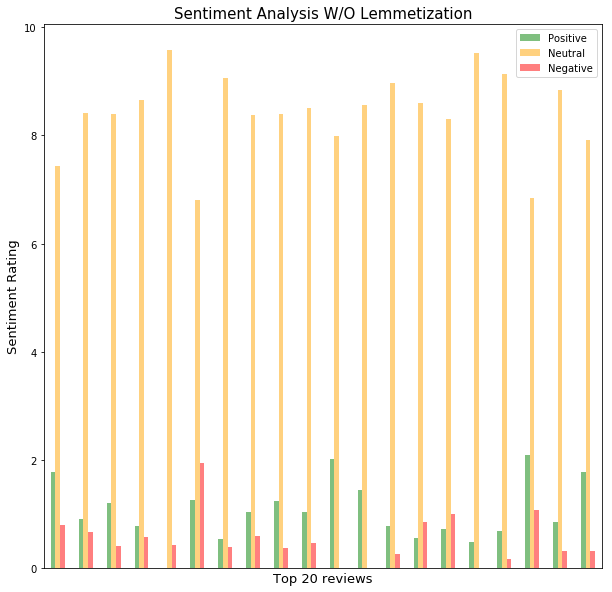

In [6]:
fig, axes = plt.subplots(figsize=(10, 10))
new_rev_df.plot(kind='bar', stacked=False, alpha=0.5,width=0.5,ax=axes,color=['green','orange','red'])
axes.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
axes.set_xlabel("Top 20 reviews",fontsize=13)
axes.set_ylabel("Sentiment Rating",fontsize=13)
axes.set_title('Sentiment Analysis W/O Lemmetization',fontsize=15)
fig.savefig('sent_analysis1.png')

In [7]:
def data_clean( rev, remove_stopwords=True): 
    

    new_text = re.sub("[^a-zA-Z]"," ", rev)
   
    words = new_text.lower().split()
    
    if remove_stopwords:
        sts = set(stopwords.words("english"))
        words = [w for w in words if not w in sts]
    ary=[]
    lemmatizer = WordNetLemmatizer()
    for word in words:
        ary.append(lemmatizer.lemmatize(word))

    
    return(ary)

In [8]:
review_data.count()

reviewerID    57080
asin          57080
reviewText    57075
overall       57080
summary       57079
dtype: int64

In [9]:
review_data.dropna(inplace=True)

In [10]:
review_data.count()

reviewerID    57074
asin          57074
reviewText    57074
overall       57074
summary       57074
dtype: int64

In [11]:
clean_reviewData = []
for rev in review_data['reviewText']:
    clean_reviewData.append( " ".join(data_clean(rev)))
    


In [12]:
len(clean_reviewData)

57074

In [13]:
Most_used_Words_Review =pd.Series(' '.join(clean_reviewData).lower().split()).value_counts()[:20]
print (Most_used_Words_Review)

size       24392
like       23099
fit        19781
shoe       18226
would      17986
wear       16701
look       15352
one        14686
small      11848
good       10426
really     10165
foot        9689
get         9675
ordered     8650
back        8519
well        8142
little      8098
time        8042
color       7788
even        7546
dtype: int64


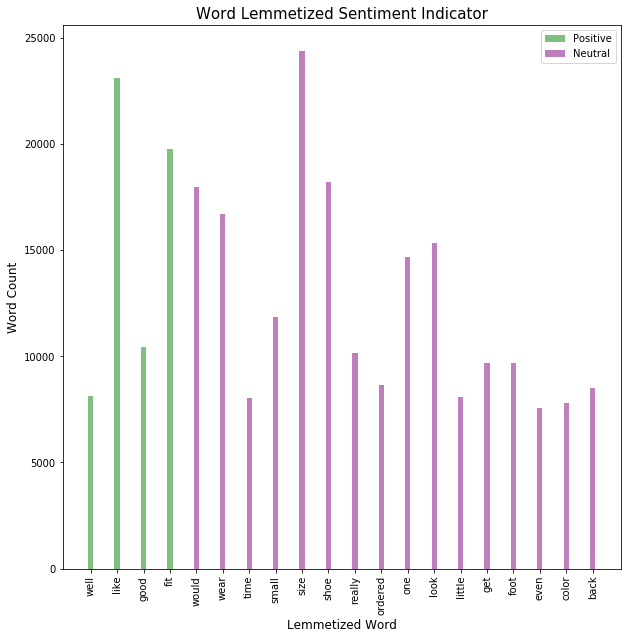

In [15]:
clean_rev_df=pd.DataFrame(Most_used_Words_Review)

clean_rev_df=clean_rev_df.reset_index()
clean_rev_df = clean_rev_df.rename(columns={'index': 'word', 0: 'count'})
clean_rev_df

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sample_review = clean_rev_df['word']
pos_arr=[]
neu_arr=[]
neg_arr=[]
for test in sample_review:    
    ss = analyser.polarity_scores(test)    
    pos_arr.append(ss['pos'])
    neu_arr.append(ss['neu'])
    neg_arr.append(ss['neg'])
    
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]))
        


clean_rev_df['pos_arr']=pos_arr
clean_rev_df['neu_arr']=neu_arr
clean_rev_df['neg_arr']=neg_arr



clean_rev_df.sort_values('word',ascending=False,inplace=True)
clean_rev_df

import numpy as np
import matplotlib.pyplot as plt

x = clean_rev_df['word']
y = clean_rev_df['count']

fig, ax = plt.subplots(figsize=(10, 10))
mask1=clean_rev_df['pos_arr']==1.0
mask2=clean_rev_df['neu_arr']==1.0
mask3=clean_rev_df['neg_arr']==1.0
p1=plt.bar(x[mask1], y[mask1], color = 'green',alpha=0.5,width=0.2)
p2=plt.bar(x[mask2], y[mask2], color = 'purple',alpha=0.5,width=0.2)
p3=plt.bar(x[mask3], y[mask3], color = 'red',alpha=0.5,width=0.2)
ax.set_title('Word Lemmetized Sentiment Indicator',fontsize=15)
ax.set_xlabel("Lemmetized Word",fontsize=12)
ax.set_ylabel("Word Count",fontsize=12)
plt.legend(['Positive','Neutral'])
plt.xticks(rotation='vertical')
plt.show()
fig.savefig('lemmet_analysis.png')

In [150]:
clean_summaryData = []
for rev in review_data['summary']:
    clean_summaryData.append( " ".join(data_clean(rev)))

In [151]:
Most_used_Words_Summary = pd.Series(' '.join(clean_summaryData).lower().split()).value_counts()[0:25]
print (Most_used_Words_Summary)

small           1979
fit             1310
cheap           1147
size            1043
quality          953
like             842
good             728
way              717
shoe             643
poor             635
big              593
look             560
disappointed     558
run              535
cute             463
made             459
one              438
great            429
bad              420
expected         418
buy              401
large            389
nice             379
sizing           374
tight            370
dtype: int64


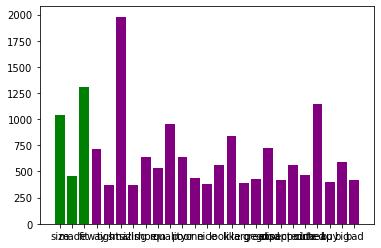

In [152]:
clean_summ_df=pd.DataFrame(Most_used_Words_Summary)

clean_summ_df=clean_summ_df.reset_index()
clean_summ_df = clean_summ_df.rename(columns={'index': 'word', 0: 'count'})


from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser1 = SentimentIntensityAnalyzer()
sample_review1 = clean_summ_df['word']
pos_arr1=[]
neu_arr1=[]
neg_arr1=[]
for test in sample_review1:    
    ss = analyser.polarity_scores(test)
    
    pos_arr1.append(ss['pos'])
    neu_arr1.append(ss['neu'])
    neg_arr1.append(ss['neg'])
    
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]))
        


clean_summ_df['pos_arr']=pos_arr
clean_summ_df['neu_arr']=neu_arr
clean_summ_df['neg_arr']=neg_arr



clean_summ_df.sort_values('word',ascending=False,inplace=True)


import numpy as np
import matplotlib.pyplot as plt

x = clean_summ_df['word']
y = clean_summ_df['count']

mask1=clean_summ_df['pos_arr']==1.0
mask2=clean_summ_df['neu_arr']==1.0
mask3=clean_summ_df['neg_arr']==1.0
plt.bar(x[mask1], y[mask1], color = 'green')
plt.bar(x[mask2], y[mask2], color = 'purple')
plt.bar(x[mask3], y[mask3], color = 'red')
plt.show()